In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "./img1.jpg"
image = cv2.imread(path)

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

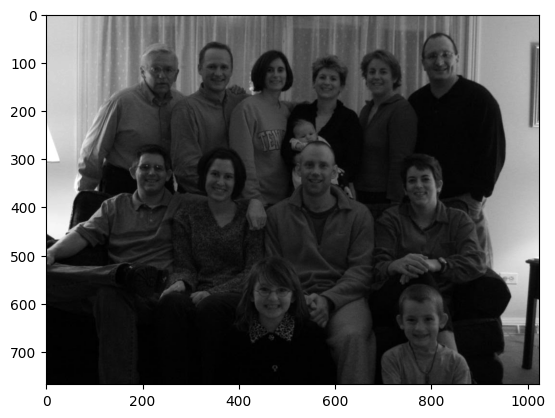

In [5]:
plt.imshow(gray, cmap="gray")

In [ ]:
# def glcm_matrix (distance, angle, levels, image):
#     glcm = np.zeros((levels, levels), dtype=np.int32)
#     rows, cols = image.shape
#     for i in range(rows):
#         for j in range(cols - distance):
#             row_val = image[i, j]
#             col_val = image[i, j + distance]
#             glcm[row_val, col_val] += 1
#     glcm = glcm.astype(np.float32)
#     glcm /= glcm.sum() 
#     return glcm


def compute_glcm(image, distance, angle, levels):
    glcm = np.zeros((levels, levels), dtype=np.int32)
    rows, cols = image.shape
    dx = int(round(distance * np.cos(np.deg2rad(angle))))
    dy = int(round(distance * np.sin(np.deg2rad(angle))))
    for i in range(rows):
        for j in range(cols):
            
            ni, nj = i + dy, j + dx

            
            if 0 <= ni < rows and 0 <= nj < cols:
                row_val = image[i, j]
                col_val = image[ni, nj]
                glcm[row_val, col_val] += 1
    glcm = glcm.astype(np.float32)
    glcm /= glcm.sum() if glcm.sum() > 0 else 1

    return glcm


In [23]:
glcm = compute_glcm(gray, 1, 45, 256)

contrast = 0
energy = 0
levels = 256
for i in range(levels):
    for j in range(levels):
        contrast += (i - j) ** 2 * glcm[i, j]
        energy += glcm[i, j] ** 2
print("Contrast:", contrast)
print("Energy:", energy)
print("\n\n")
print(glcm)


Contrast: 43.557264354626
Energy: 0.0036364002155557665



[[3.2881281e-04 3.1224469e-04 2.4724682e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.3900855e-04 1.1187281e-02 2.3985491e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.9567661e-04 2.6241301e-03 4.0494952e-02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0195746e-05
  1.1470213e-05 2.6763832e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1665959e-05
  1.9117024e-05 4.4606386e-05]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.4410641e-05
  7.0095753e-05 1.0272213e-03]]


In [24]:
glcm = compute_glcm(gray, 2, 90, 256)

contrast = 0
energy = 0
levels = 256
for i in range(levels):
    for j in range(levels):
        contrast += (i - j) ** 2 * glcm[i, j]
        energy += glcm[i, j] ** 2

print("Contrast:", contrast)
print("Energy:", energy)
print("\n\n")
print(glcm)


Contrast: 49.482790440761846
Energy: 0.003495629301219183



[[4.36010945e-04 2.25654774e-04 2.71550671e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.77925108e-04 1.09321456e-02 2.41208379e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.87408208e-04 2.82259705e-03 4.03220877e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.64931428e-06
  1.65735146e-05 4.20712313e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.40237435e-05
  2.03981726e-05 6.50191723e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.18721432e-05
  4.84456577e-05 1.06070493e-03]]


In [31]:
for i in range(10, 30):
    path = f"./MRI/Tumor/Tr-me_00{i}.jpg"
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = compute_glcm(gray, 1, 0, 256)
    contrast = 0
    energy = 0
    levels = 256
    for i in range(levels):
        for j in range(levels):
            contrast += (i - j) ** 2 * glcm[i, j]
            energy += glcm[i, j] ** 2
    
    print("Contrast:", contrast)
    print("Energy:", energy)
    print("\n\n")


Contrast: 17.19392875948688
Energy: 0.10848106355144185



Contrast: 14.19208649668144
Energy: 0.10007021369375559



Contrast: 12.648078129495843
Energy: 0.10743881972933694



Contrast: 46.11703427811153
Energy: 0.08849893873192702



Contrast: 13.908543198922416
Energy: 0.10970237682083718



Contrast: 12.445824580616318
Energy: 0.11702377334723052



Contrast: 25.47913080919534
Energy: 0.10710742201913198



Contrast: 43.11724834240158
Energy: 0.049280434486097716



Contrast: 19.529132382536773
Energy: 0.10829368748920554



Contrast: 16.56521361891646
Energy: 0.10200357208274609



Contrast: 48.0120318121335
Energy: 0.09858062295032552



Contrast: 33.23101889799
Energy: 0.10592133467165815



Contrast: 44.542716160285636
Energy: 0.09917670657485976



Contrast: 62.30237845929514
Energy: 0.07885664347337089



Contrast: 46.811911046810565
Energy: 0.09393664885245988



Contrast: 41.04101914902276
Energy: 0.09517794036862773



Contrast: 43.085975411566324
Energy: 0.04272456152543

In [32]:
for i in range(10, 30):
    path = f"./MRI/Non-Tumor/Tr-no_00{i}.jpg"
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = compute_glcm(gray, 1, 0, 256)
    contrast = 0
    energy = 0
    levels = 256
    for i in range(levels):
        for j in range(levels):
            contrast += (i - j) ** 2 * glcm[i, j]
            energy += glcm[i, j] ** 2
    
    print("Contrast:", contrast)
    print("Energy:", energy)
    print("\n\n")

Contrast: 319.5921303321411
Energy: 0.32700698391797334



Contrast: 39.03118864936141
Energy: 0.06370049894434358



Contrast: 39.03118864936141
Energy: 0.06370049894434358



Contrast: 65.89268001654273
Energy: 0.024463857173161446



Contrast: 65.89268001654273
Energy: 0.024463857173161446



Contrast: 90.41993926484452
Energy: 0.04218571854312055



Contrast: 54.283287098966866
Energy: 0.05197100609447393



Contrast: 177.56008593831575
Energy: 0.0746333064979944



Contrast: 102.66999655224572
Energy: 0.013132849095799641



Contrast: 44.38531091867276
Energy: 0.016953581848204342



Contrast: 293.23370678932406
Energy: 0.018166970188577918



Contrast: 29.74046295001085
Energy: 0.05092526370711456



Contrast: 41.11158820507035
Energy: 0.04156518460691877



Contrast: 22.391950069138602
Energy: 0.10068006651468218



Contrast: 39.03118864936141
Energy: 0.06370049894434358



Contrast: 59.621156259142026
Energy: 0.06436317239042799



Contrast: 188.39007204532754
Energy: 0.0569628